<a href="https://colab.research.google.com/github/mondinilara/ordenacao-log-quadratica/blob/main/GerandoGrafico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install matplotlib numpy

5 arquivos lidos com sucesso.

Médias calculadas:
   Tamanho  SelectionSort(ms)  LogQuadratica(ms)  Cubica(ms)
0       10                2.0                2.2         1.6
1      100               20.4               17.6        26.2
2     1000              191.4              331.6     11584.0
3     2000              774.8             1171.2     89549.6


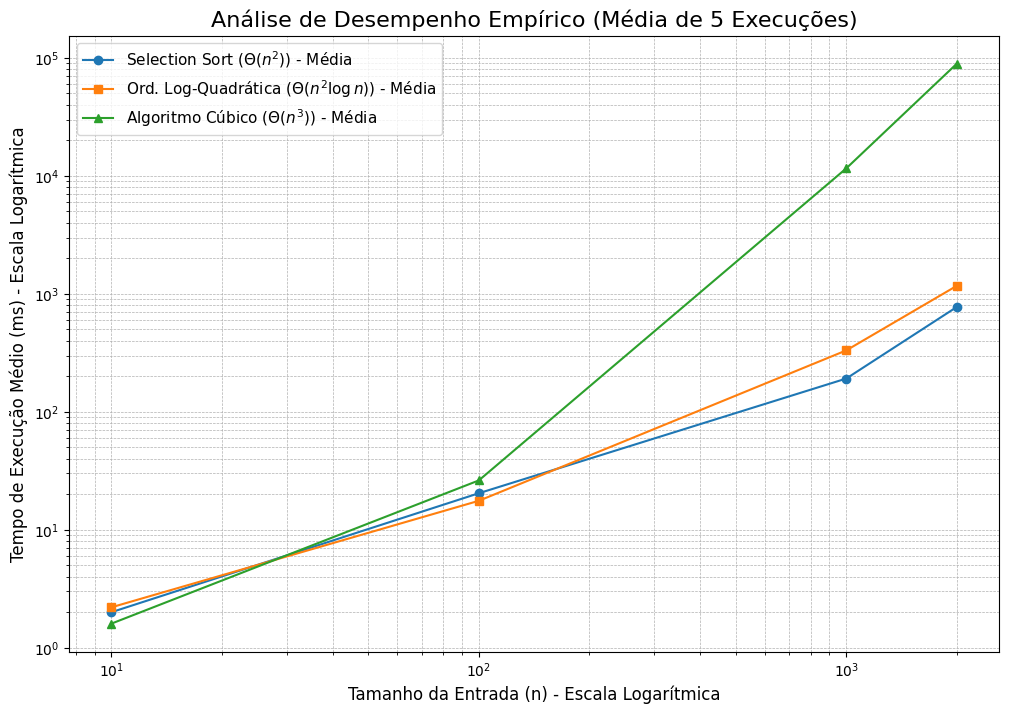

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os

# ==============================================================================
# PASSO 1: LISTA DOS ARQUIVOS CSV COM OS RESULTADOS
# ==============================================================================
lista_arquivos_csv = [
    'resultados_ordenadoDecrescente_1.csv',
    'resultados_ordenadoDecrescente_2.csv',
    'resultados_ordenadoDecrescente_3.csv',
    'resultados_ordenadoDecrescente_4.csv',
    'resultados_ordenadoDecrescente_5.csv'
]

# ==============================================================================
# PASSO 2: O CÓDIGO ABAIXO LÊ OS ARQUIVOS, CALCULA A MÉDIA E GERA O GRÁFICO
# ==============================================================================

# Verifica se todos os arquivos listados realmente existem
for arquivo in lista_arquivos_csv:
    if not os.path.exists(arquivo):
        print(f"Erro: O arquivo '{arquivo}' não foi encontrado.")
        print("Por favor, verifique se todos os arquivos da lista estão na mesma pasta que o script.")
        sys.exit()

# Lê todos os arquivos CSV em uma lista de DataFrames do Pandas
try:
    lista_de_dataframes = [pd.read_csv(f) for f in lista_arquivos_csv]
    print(f"{len(lista_de_dataframes)} arquivos lidos com sucesso.")
except Exception as e:
    print(f"Ocorreu um erro ao ler os arquivos CSV: {e}")
    sys.exit()

# Pega os nomes das colunas e os valores de 'n' do primeiro arquivo
# (assume-se que são os mesmos para todos os arquivos)
colunas_de_tempo = lista_de_dataframes[0].columns[1:] # Pega todas as colunas exceto a primeira ('Tamanho')
n_valores = lista_de_dataframes[0]['Tamanho']

dados_medios = pd.DataFrame({'Tamanho': n_valores})

for coluna in colunas_de_tempo:
    df_temp = pd.concat([df[coluna] for df in lista_de_dataframes], axis=1)

    dados_medios[coluna] = df_temp.mean(axis=1)

print("\nMédias calculadas:")
print(dados_medios)

plt.figure(figsize=(12, 8))

plt.plot(dados_medios['Tamanho'], dados_medios['SelectionSort(ms)'], marker='o', linestyle='-', label='Selection Sort ($\Theta(n^2)$) - Média')
plt.plot(dados_medios['Tamanho'], dados_medios['LogQuadratica(ms)'], marker='s', linestyle='-', label='Ord. Log-Quadrática ($\Theta(n^2 \log n)$) - Média')
plt.plot(dados_medios['Tamanho'], dados_medios['Cubica(ms)'], marker='^', linestyle='-', label='Algoritmo Cúbico ($\Theta(n^3)$) - Média')

plt.xscale('log')
plt.yscale('log')

plt.title('Análise de Desempenho Empírico (Média de 5 Execuções)', fontsize=16)
plt.xlabel('Tamanho da Entrada (n) - Escala Logarítmica', fontsize=12)
plt.ylabel('Tempo de Execução Médio (ms) - Escala Logarítmica', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)

nome_imagem_saida = 'grafico_desempenho_media.png'
plt.savefig(nome_imagem_saida, dpi=300, bbox_inches='tight')

plt.show()
